In [1]:
import numpy as np
import matplotlib.pyplot as plt


num of hidden layers, 
activation function, 
num of epochs, batch size, 
learning rate with scheduler

---------------------------
activation function

lr=1e-2

epochs=20

batch_size = 1

nodes_per_hidden_layer=12

number_of_hidden_layer=2

optimizer = opt.Adam(model.parameters(), lr=lr)

criterion = torch.nn.MSELoss().to(device)



In [2]:
import pygad
import numpy

function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

fitness_function = fitness_func

def on_start(ga_instance):
    print("on_start()")

def on_fitness(ga_instance, population_fitness):
    print("on_fitness()")

def on_parents(ga_instance, selected_parents):
    print("on_parents()")

def on_crossover(ga_instance, offspring_crossover):
    print("on_crossover()")

def on_mutation(ga_instance, offspring_mutation):
    print("on_mutation()")

def on_generation(ga_instance):
    print("on_generation()")

def on_stop(ga_instance, last_population_fitness):
    print("on_stop()")

ga_instance = pygad.GA(num_generations=3,
                       num_parents_mating=5,
                       fitness_func=fitness_function,
                       sol_per_pop=10,
                       num_genes=len(function_inputs),
                       on_start=on_start,
                       on_fitness=on_fitness,
                       on_parents=on_parents,
                       on_crossover=on_crossover,
                       on_mutation=on_mutation,
                       on_generation=on_generation,
                       on_stop=on_stop)

ga_instance.run()

on_start()
on_fitness()
on_parents()
on_crossover()
on_mutation()
on_generation()
on_fitness()
on_parents()
on_crossover()
on_mutation()
on_generation()
on_fitness()
on_parents()
on_crossover()
on_mutation()
on_generation()
on_stop()


/opt/homebrew/Caskroom/miniforge/base/envs/torch3/lib/python3.9/site-packages/pygad/pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Generation = 1
Fitness    = 0.8389691636155442
Change     = 0.8389691636155442
Generation = 2
Fitness    = 1.5031120919763534
Change     = 0.6641429283608092
Generation = 3
Fitness    = 4.377292417156689
Change     = 2.874180325180336
Generation = 4
Fitness    = 13.20883805376078
Change     = 8.83154563660409
Generation = 5
Fitness    = 13.20883805376078
Change     = 0.0
Generation = 6
Fitness    = 204.64642756917493
Change     = 191.43758951541415
Generation = 7
Fitness    = 204.64642756917493
Change     = 0.0
Generation = 8
Fitness    = 204.64642756917493
Change     = 0.0
Generation = 9
Fitness    = 204.64642756917493
Change     = 0.0
Generation = 10
Fitness    = 204.64642756917493
Change     = 0.0
Generation = 11
Fitness    = 204.64642756917493
Change     = 0.0
Generation = 12
Fitness    = 204.64642756917493
Change     = 0.0
Generation = 13
Fitness    = 204.64642756917493
Change     = 0.0
Generation = 14
Fitness    = 204.64642756917493
Change     = 0.0
Generation = 15
Fitness    = 2

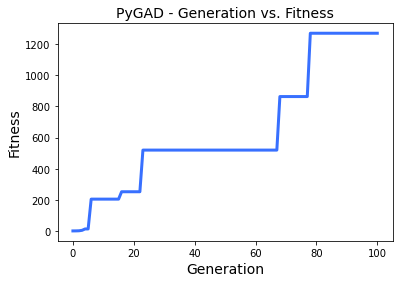

Parameters of the best solution : [ 2.23100831 -2.90610626 -2.74751037 -1.9554696  -3.70244241 -1.68751271]
Fitness value of the best solution = 1269.4695194194105
Index of the best solution : 0
Predicted output based on the best solution : 44.00078773061086
Best fitness value reached after 78 generations.


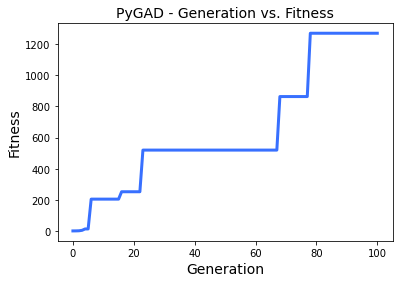

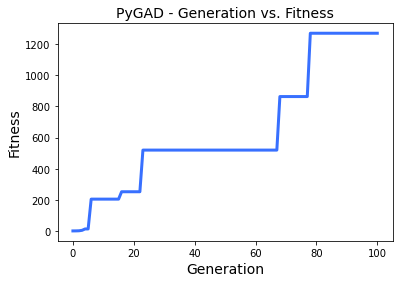

In [4]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(solution, solution_idx):
    # print(np.shape(solution))
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                    #    on_fitness=on_fitness, # fitness_function이 population 각각에 진행이 되는 것인지 아니면, 하나씩 진행되는 것인지 팍악하기위해 넣음.--> 하나씩 진행함.
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       on_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()

Generation = 1
Fitness    = 1.3647225880148153
Generation = 2
Fitness    = 1.5225950254746594
Generation = 3
Fitness    = 10.012333578984078
Generation = 4
Fitness    = 12.339209138873985
Generation = 5
Fitness    = 12.339209138873985
Generation = 6
Fitness    = 12.339209138873985
Generation = 7
Fitness    = 15.732011919218811
Generation = 8
Fitness    = 15.732011919218811
Generation = 9
Fitness    = 15.732011919218811
Generation = 10
Fitness    = 15.732011919218811
Generation = 11
Fitness    = 15.732011919218811
Generation = 12
Fitness    = 15.732011919218811
Generation = 13
Fitness    = 15.732011919218811
Generation = 14
Fitness    = 15.732011919218811
Generation = 15
Fitness    = 15.732011919218811
Generation = 16
Fitness    = 15.732011919218811
Generation = 17
Fitness    = 15.732011919218811
Generation = 18
Fitness    = 15.732011919218811
Generation = 19
Fitness    = 15.732011919218811
Generation = 20
Fitness    = 15.732011919218811
Generation = 21
Fitness    = 15.732011919218811
G

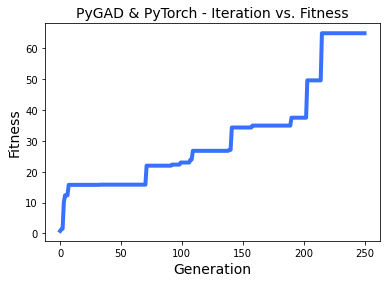

Fitness value of the best solution = 64.78406851935617
Index of the best solution : 0
Predictions : 
 [[0.10059358]
 [0.6341727 ]
 [1.3268123 ]
 [2.499835  ]]
Absolute Error :  0.015435884


In [6]:
import torch
from pygad import torchga
import pygad

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function

    predictions = pygad.torchga.predict(model=model,
                                        solution=solution,
                                        data=data_inputs)

    abs_error = loss_function(predictions, data_outputs).detach().numpy() + 0.00000001

    solution_fitness = 1.0 / abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Create the PyTorch model.
input_layer = torch.nn.Linear(3, 5)
relu_layer = torch.nn.ReLU()
output_layer = torch.nn.Linear(5, 1)

model = torch.nn.Sequential(input_layer,
                            relu_layer,
                            output_layer)
# print(model)

# Create an instance of the pygad.torchga.TorchGA class to build the initial population.
torch_ga = torchga.TorchGA(model=model,
                           num_solutions=10)

loss_function = torch.nn.L1Loss()

# Data inputs
data_inputs = torch.tensor([[0.02, 0.1, 0.15],
                            [0.7, 0.6, 0.8],
                            [1.5, 1.2, 1.7],
                            [3.2, 2.9, 3.1]])

# Data outputs
data_outputs = torch.tensor([[0.1],
                             [0.6],
                             [1.3],
                             [2.5]])

# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 250 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = torch_ga.population_weights # Initial population of network weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Make predictions based on the best solution.
predictions = pygad.torchga.predict(model=model,
                                    solution=solution,
                                    data=data_inputs)
print("Predictions : \n", predictions.detach().numpy())

abs_error = loss_function(predictions, data_outputs)
print("Absolute Error : ", abs_error.detach().numpy())
